In [6]:
import numpy as np
from scipy.special import erf
from scipy.stats import beta as beta_dist
from scipy.stats import truncnorm
from scipy.interpolate import interp1d
import bilby
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.prior import LogUniform
from bilby.hyper.likelihood import HyperparameterLikelihood
from scipy import interpolate
from scipy import integrate
import random
import argparse
import os
import glob
import warnings
warnings.filterwarnings("ignore")
#####################
samples_new=np.loadtxt('/home/lz/work/pulsar_kick_velocity/V_3D_18_20err_aligment.txt')
outdir='hy_outdir'
data_exp=samples_new
import sys
#import utilizes
n_samples=1000
npool=300
NN=int(len(data_exp)/n_samples)
nlive=2000
mx=n_samples
#################################
data_df=list()
ns_m=abs(data_exp)
for i in range(NN):
    re=pd.DataFrame(ns_m[i*mx:(i+1)*mx],columns=['mu'])
    data_df.append(re)
samples = data_df

def run_prior(dataset):
    return 1



15:31 bilby INFO    : Running for label 'u_hype_68279', output will be saved to 'hy_outdir'
15:31 bilby INFO    : Analysis priors:
15:31 bilby INFO    : k=LogUniform(minimum=0.01, maximum=10, name='k', latex_label='$k$', unit=None, boundary=None)
15:31 bilby INFO    : theta=LogUniform(minimum=1, maximum=400, name='theta', latex_label='$\\theta$(km/s)', unit=None, boundary=None)
15:31 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
15:31 bilby INFO    : Analysis likelihood noise evidence: 0
15:31 bilby INFO    : Single likelihood evaluation took 1.967e-04 s
15:31 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_interval': 600, 'first_update': None, 'rstate': None, 'queue_size': 300, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 

1it [00:00, ?it/s]

15:31 bilby INFO    : Written checkpoint file hy_outdir/u_hype_68279_resume.pickle
15:32 bilby INFO    : Starting to close worker pool.
15:32 bilby INFO    : Finished closing worker pool.
15:32 bilby INFO    : Rejection sampling nested samples to obtain 5381 posterior samples


15:32 bilby INFO    : Sampling time: 0:00:22.512441
15:32 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:32 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:32 bilby INFO    : Summary of results:
nsamples: 5381
ln_noise_evidence:  0.000
ln_evidence: -128.039 +/-  0.057
ln_bayes_factor: -128.039 +/-  0.057



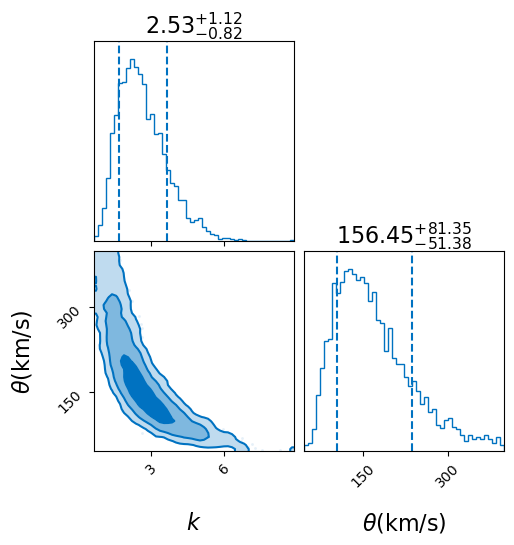

In [ ]:
from scipy.special import beta
from scipy.special import gamma
def hyper_prior_gamma(dataset, k,theta):
    return (1 / (gamma(k)*theta**k)) * dataset['mu']**(k-1) *np.exp(-dataset['mu']/theta)

hp_priors_gamma = dict(k=LogUniform(0.01,10, 'k',r'$k$'),
                theta=Uniform(1, 400, 'theta',r'$\theta$(km/s)') )

hyper_prior_gamma=hyper_prior_gamma

hp_likelihood_gamma = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_gamma,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_gamma =hp_priors_gamma
# And run sampler
result_gamma = run_sampler(
    likelihood=hp_likelihood_gamma, priors=hp_priors_gamma, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_gamma.plot_corner(title_fmt='.1f')

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1239099/2974162998.py:4: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),
/tmp/ipykernel_1239099/2974162998.py:5: SyntaxWarning: invalid escape sequence '\s'
  s_sigma=LogUniform(0.01, 10, 's_sigma', '$\sigma$') )
15:56 bilby INFO    : Running for label 'u_hype_35604', output will be saved to 'hy_outdir'
15:57 bilby INFO    : Analysis priors:
15:57 bilby INFO    : s_mu=Uniform(minimum=1, maximum=10, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
15:57 bilby INFO    : s_sigma=LogUniform(minimum=0.01, maximum=10, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
15:57 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
15:57 bilby INFO    

1it [00:00, ?it/s]

15:57 bilby INFO    : Written checkpoint file hy_outdir/u_hype_35604_resume.pickle
15:57 bilby INFO    : Starting to close worker pool.
15:57 bilby INFO    : Finished closing worker pool.


15:57 bilby INFO    : Rejection sampling nested samples to obtain 5546 posterior samples
15:57 bilby INFO    : Sampling time: 0:00:27.475008
15:57 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:57 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
15:57 bilby INFO    : Summary of results:
nsamples: 5546
ln_noise_evidence:  0.000
ln_evidence: -129.091 +/-  0.061
ln_bayes_factor: -129.091 +/-  0.061



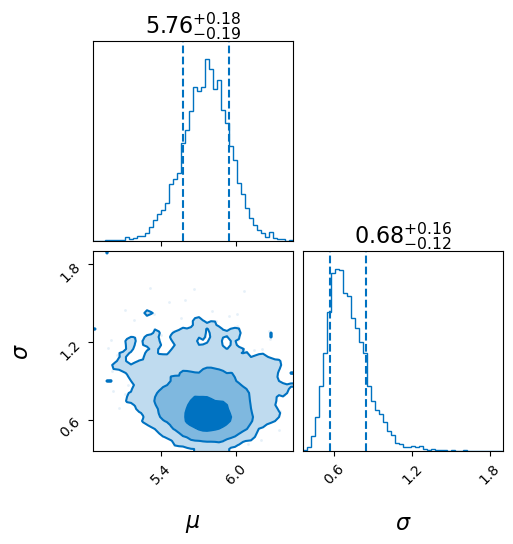

In [ ]:
def hyper_prior_lognorm(dataset, s_mu, s_sigma):
    return np.exp(- (np.log(dataset['mu']) - s_mu)**2 / (2 * s_sigma**2)) /\
        (2 * np.pi * s_sigma**2)**0.5/(dataset['mu'])
hp_priors_lognorm = dict(s_mu=Uniform(1, 10, 's_mu', '$\mu$'),
                 s_sigma=Uniform(0.01, 10, 's_sigma', '$\sigma$') )

hyper_prior_lognorm=hyper_prior_lognorm
hp_likelihood_lognorm = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_lognorm,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_lognorm =hp_priors_lognorm

# And run sampler
result_lognorm = run_sampler(
    likelihood=hp_likelihood_lognorm, priors=hp_priors_lognorm, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_lognorm.plot_corner()

In [4]:
print(max(samples_new))

3194.489948


16:04 bilby INFO    : Running for label 'maxwell_hype_40965', output will be saved to 'hy_outdir'
16:04 bilby INFO    : Analysis priors:
16:04 bilby INFO    : sigma=Uniform(minimum=10, maximum=2500, name='sigma', latex_label='$\\sigma$', unit=None, boundary=None)
16:04 bilby INFO    : mlo=LogUniform(minimum=0.001, maximum=400, name='mlo', latex_label='$\\rm{v^{lo}}$', unit=None, boundary=None)
16:04 bilby INFO    : mup=Uniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^{up}}$', unit=None, boundary=None)
16:04 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:04 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
16:04 bilby INFO    : Single likelihood evaluation took 4.705e-04 s
16:04 bilby INFO    : 

1it [00:00, ?it/s]

16:05 bilby INFO    : Written checkpoint file hy_outdir/maxwell_hype_40965_resume.pickle
16:05 bilby INFO    : Starting to close worker pool.
16:05 bilby INFO    : Finished closing worker pool.
16:05 bilby INFO    : Rejection sampling nested samples to obtain 4170 posterior samples
16:05 bilby INFO    : Sampling time: 0:00:26.792415


16:05 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:05 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:05 bilby INFO    : Summary of results:
nsamples: 4170
ln_noise_evidence:  0.000
ln_evidence: -128.538 +/-  0.051
ln_bayes_factor: -128.538 +/-  0.051



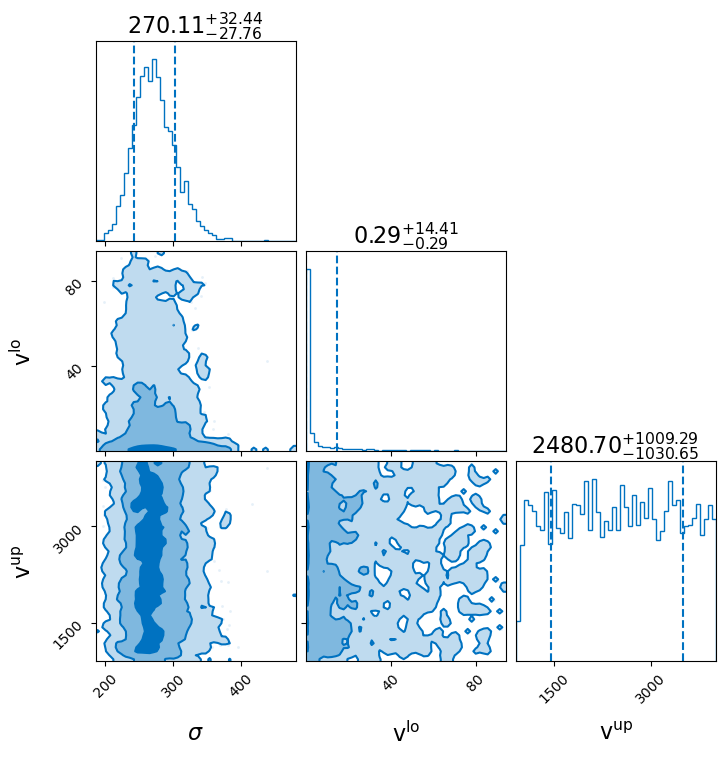

In [22]:
from scipy.stats import maxwell
from scipy.integrate import quad
def hyper_prior_maxwell(dataset,mlo,mup,sigma):
    log_likelihood = ((dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) * maxwell.pdf(dataset['mu'],scale=sigma)
    return log_likelihood

hp_priors_maxwell = dict(sigma=Uniform(10, 2500, 'sigma', r'$\sigma$'),
                        mlo=LogUniform(0.001,400,'mlo', r'$\rm{v^{lo}}$'),
                        mup=Uniform(400,4000,'mup', r'$\rm{v^{up}}$')
                        )

hyper_prior_maxwell = hyper_prior_maxwell
hp_likelihood_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_maxwell = hp_priors_maxwell
result_maxwell = run_sampler(
    likelihood=hp_likelihood_maxwell, priors=hp_priors_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

result_maxwell.plot_corner()

16:05 bilby INFO    : Running for label 'double_maxwell_hype_16717', output will be saved to 'hy_outdir'
16:05 bilby INFO    : Analysis priors:
16:05 bilby INFO    : sigma1=Uniform(minimum=10, maximum=2500, name='sigma1', latex_label='$\\sigma_1$(km/s)', unit=None, boundary=None)
16:05 bilby INFO    : sigma2=Uniform(minimum=10, maximum=2500, name='sigma2', latex_label='$\\sigma_2$(km/s)', unit=None, boundary=None)
16:05 bilby INFO    : alpha=Uniform(minimum=0.01, maximum=0.99, name='alpha', latex_label='$\\alpha$', unit=None, boundary=None)
16:05 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:05 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
16:05 bilby INFO    : Single likelihood evaluation took 6.681e-04 s
1

1it [00:00, ?it/s]

16:07 bilby INFO    : Written checkpoint file hy_outdir/double_maxwell_hype_16717_resume.pickle
16:07 bilby INFO    : Starting to close worker pool.
16:07 bilby INFO    : Finished closing worker pool.


16:07 bilby INFO    : Rejection sampling nested samples to obtain 6044 posterior samples
16:07 bilby INFO    : Sampling time: 0:01:59.150138
16:07 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:07 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:07 bilby INFO    : Summary of results:
nsamples: 6044
ln_noise_evidence:  0.000
ln_evidence: -128.613 +/-  0.058
ln_bayes_factor: -128.613 +/-  0.058



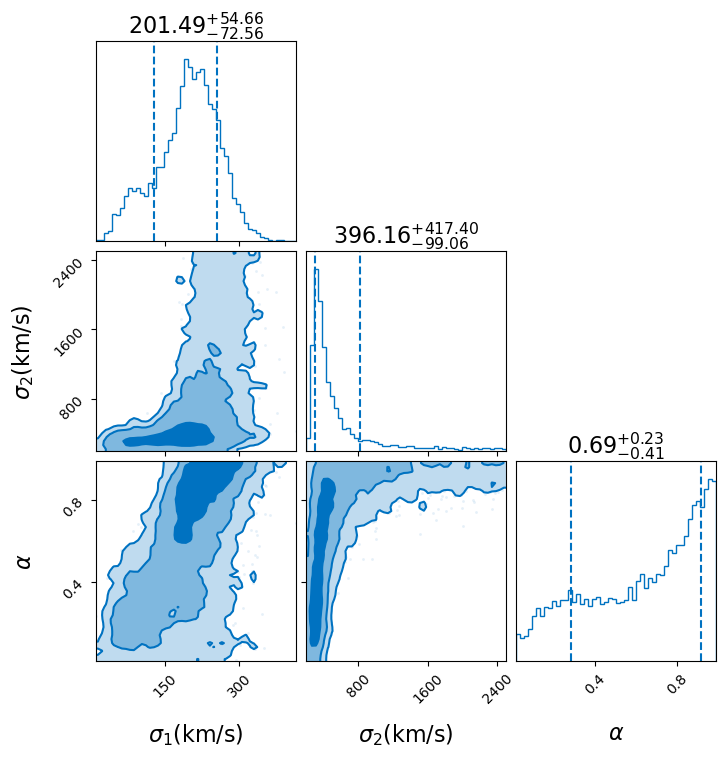

In [ ]:
def hyper_prior_double_maxwell(dataset,sigma1, sigma2, alpha):
    mup=4000
    mlo=0.001
    # 数据范围限制
    sigma_constraint = (mlo < sigma1) & (sigma1 < sigma2) & (sigma2 < mup)
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    
    # Maxwell PDF for the two components
    pdf1 = maxwell.pdf(dataset['mu'], scale=sigma1)
    pdf2 = maxwell.pdf(dataset['mu'], scale=sigma2)
    # Combined mixture PDF
    mixture_pdf = alpha * pdf1 + (1 - alpha) * pdf2
    # Apply range restriction
    log_likelihood = sigma_constraint*valid_range * mixture_pdf
    return log_likelihood

hp_priors_double_maxwell = dict(
    sigma1=Uniform(10, 2500, 'sigma1', r'$\sigma_1$(km/s)'),
    sigma2=Uniform(10, 2500, 'sigma2', r'$\sigma_2$(km/s)'),
    alpha=Uniform(0.01, 0.99, 'alpha', r'$\alpha$')
)

hyper_prior_double_maxwell = hyper_prior_double_maxwell

hp_likelihood_double_maxwell = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_double_maxwell,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_double_maxwell = hp_priors_double_maxwell
# 运行采样器
result_2M = run_sampler(
    likelihood=hp_likelihood_double_maxwell, priors=hp_priors_double_maxwell, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='double_maxwell_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_2M.plot_corner()

16:07 bilby INFO    : Running for label 'u_hype_62319', output will be saved to 'hy_outdir'
16:07 bilby INFO    : Analysis priors:
16:07 bilby INFO    : mlo=LogUniform(minimum=0.001, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
16:07 bilby INFO    : mup=Uniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
16:07 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:07 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
16:07 bilby INFO    : Single likelihood evaluation took 1.408e-04 s
16:07 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'periodic': None, 'reflective': None, 'update_inte

1it [00:00, ?it/s]

16:08 bilby INFO    : Written checkpoint file hy_outdir/u_hype_62319_resume.pickle
16:08 bilby INFO    : Starting to close worker pool.
16:08 bilby INFO    : Finished closing worker pool.


16:08 bilby INFO    : Rejection sampling nested samples to obtain 7547 posterior samples
16:08 bilby INFO    : Sampling time: 0:00:28.638950
16:08 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:08 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:08 bilby INFO    : Summary of results:
nsamples: 7547
ln_noise_evidence:  0.000
ln_evidence: -128.722 +/-  0.060
ln_bayes_factor: -128.722 +/-  0.060



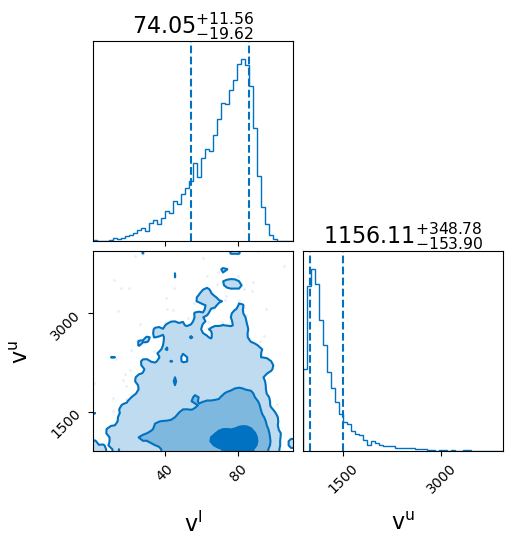

In [24]:
def hyper_prior_logu(dataset,mlo,mup):
    return (( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))/( dataset['mu'] * np.log(mup / mlo) )

hp_priors_logu = dict(mlo=LogUniform(0.001, 400, 'mlo',r'$\rm{v^l}$'),
                mup=Uniform(400, 4000, 'mup',r'$\rm{v^u}$'))
#end log-uniform

hyper_prior_logu=hyper_prior_logu

hp_likelihood_logu = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_logu,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_logu =hp_priors_logu

# And run sampler
result_logu = run_sampler(
    likelihood=hp_likelihood_logu, priors=hp_priors_logu, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_logu.plot_corner()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1239099/4283763709.py:8: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),
/tmp/ipykernel_1239099/4283763709.py:9: SyntaxWarning: invalid escape sequence '\s'
  sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))
16:08 bilby INFO    : Running for label 'u_hype_31398', output will be saved to 'hy_outdir'
16:08 bilby INFO    : Analysis priors:
16:08 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='s_mu', latex_label='$\\mu$', unit=None, boundary=None)
16:08 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='s_sigma', latex_label='$\\sigma$', unit=None, boundary=None)
16:08 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:08 bilby INFO    : 

1it [00:00, ?it/s]

16:09 bilby INFO    : Written checkpoint file hy_outdir/u_hype_31398_resume.pickle
16:09 bilby INFO    : Starting to close worker pool.
16:09 bilby INFO    : Finished closing worker pool.
16:09 bilby INFO    : Rejection sampling nested samples to obtain 4821 posterior samples
16:09 bilby INFO    : Sampling time: 0:00:22.838999
16:09 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


16:09 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:09 bilby INFO    : Summary of results:
nsamples: 4821
ln_noise_evidence:  0.000
ln_evidence: -128.410 +/-  0.056
ln_bayes_factor: -128.410 +/-  0.056



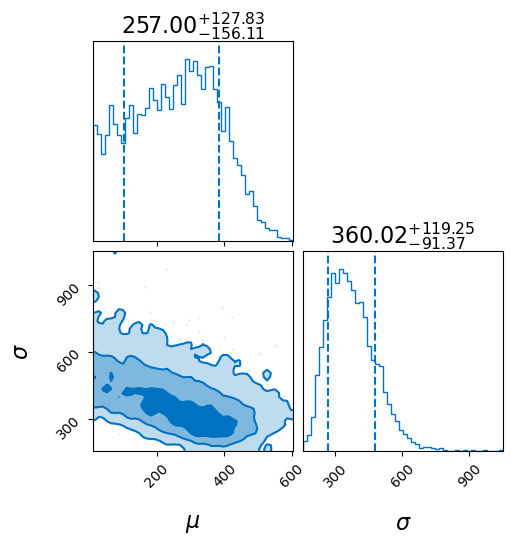

In [25]:
#begin Gaussian model with fixed upper and lower mass
def hyper_prior_G_fixed_max_min(dataset, mu, sigma):
    mup=4000
    mlo=0.001
    normalisingTerm = 0.5 * ( erf((mu-mlo)/(np.sqrt(2) * sigma)) -  erf((mu-mup)/(np.sqrt(2) * sigma)) )
    return ( ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup))*((mu>mlo)&(mu<mup)) * (np.exp(- (dataset['mu'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5) / normalisingTerm 
hp_priors_G_fixed_max_min= dict(mu=Uniform(10, 4000, 's_mu', '$\mu$'),
                 sigma=Uniform(10, 1500, 's_sigma', '$\sigma$'))
#end Gaussian with fixed upper and lower ma
#end Gaussian model 
hyper_prior_G=hyper_prior_G_fixed_max_min
hp_likelihood_G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_G =hp_priors_G_fixed_max_min

# And run sampler
result_G = run_sampler(
    likelihood=hp_likelihood_G, priors=hp_priors_G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_G.plot_corner()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1239099/3059124589.py:9: SyntaxWarning: invalid escape sequence '\m'
  hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),
/tmp/ipykernel_1239099/3059124589.py:10: SyntaxWarning: invalid escape sequence '\s'
  sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),
/tmp/ipykernel_1239099/3059124589.py:11: SyntaxWarning: invalid escape sequence '\m'
  mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),
/tmp/ipykernel_1239099/3059124589.py:12: SyntaxWarning: invalid escape sequence '\s'
  sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),
16:09 bilby INFO    : Running f

1it [00:00, ?it/s]

16:13 bilby INFO    : Written checkpoint file hy_outdir/u_hype_11080_resume.pickle
16:13 bilby INFO    : Starting to close worker pool.
16:13 bilby INFO    : Finished closing worker pool.


16:13 bilby INFO    : Rejection sampling nested samples to obtain 6526 posterior samples
16:13 bilby INFO    : Sampling time: 0:03:31.401505
16:13 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:13 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:13 bilby INFO    : Summary of results:
nsamples: 6526
ln_noise_evidence:  0.000
ln_evidence: -129.733 +/-  0.062
ln_bayes_factor: -129.733 +/-  0.062



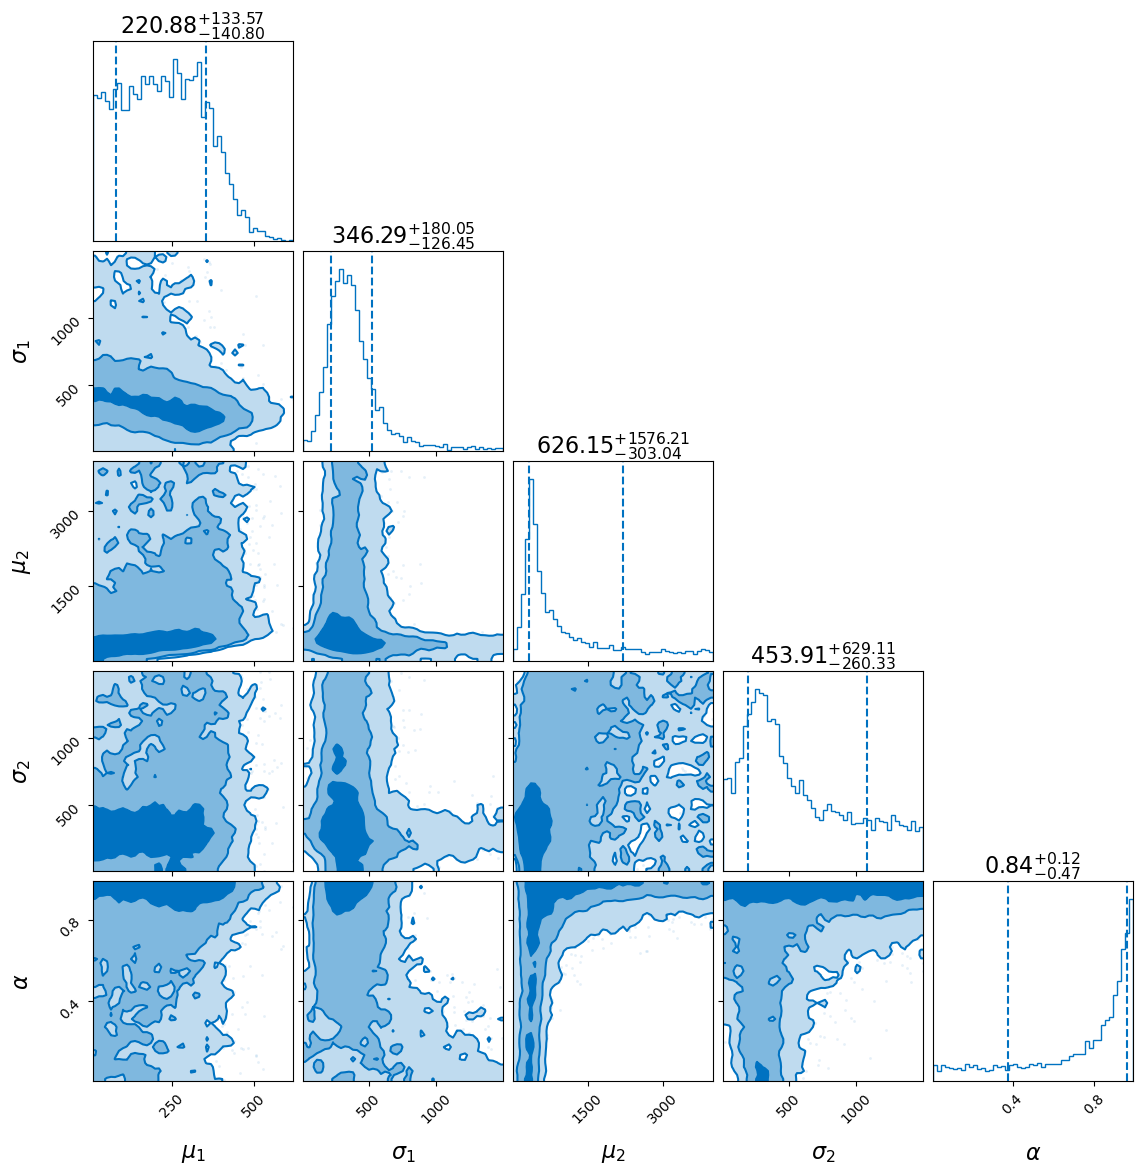

In [26]:
def hyper_prior_2G_fixed_max_min(dataset, mu1, sigma1,mu2,sigma2,alpha):
    mup=4000
    mlo=0.001
    normalisingTerm1 = 0.5 * ( erf((mu1-mlo)/(np.sqrt(2) * sigma1)) -  erf((mu1-mup)/(np.sqrt(2) * sigma1)) )
    normalisingTerm2 = 0.5 * ( erf((mu2-mlo)/(np.sqrt(2) * sigma2)) -  erf((mu2-mup)/(np.sqrt(2) * sigma2)) )
    return ((mu2 < mup ) & (mu1 > mlo) & (mu1 < mu2)  & ( dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) *\
        ( (( alpha*(np.exp(- (dataset['mu'] - mu1)**2 / (2 * sigma1**2)) /(2 * np.pi * sigma1**2)**0.5)) /normalisingTerm1) +\
        (1-alpha)*( ((np.exp(- (dataset['mu'] - mu2)**2 / (2 * sigma2**2)) /(2 * np.pi * sigma2**2)**0.5) ) / normalisingTerm2) )
hp_priors_2G_fixed_max_min = dict(mu1=Uniform(10, 4000, 'mu1', '$\mu_1$'),
                 sigma1=Uniform(10, 1500, 'sigma1', '$\sigma_1$'),
                mu2=Uniform(10, 4000, 'mu2', '$\mu_2$'),
                sigma2=Uniform(10, 1500, 'sigma2', '$\sigma_2$'),
                alpha=Uniform(0.01, 0.99, 'alpha', '$\\alpha$'))
#end two-Gausssian model with fixed lower and upper mass
 
hyper_prior_2G=hyper_prior_2G_fixed_max_min
hp_likelihood_2G = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_2G,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_2G =hp_priors_2G_fixed_max_min

# And run sampler
result_2G = run_sampler(
    likelihood=hp_likelihood_2G, priors=hp_priors_2G, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_2G.plot_corner()

16:13 bilby INFO    : Running for label 'u_hype_43295', output will be saved to 'hy_outdir'
16:13 bilby INFO    : Analysis priors:
16:13 bilby INFO    : mu=Uniform(minimum=10, maximum=4000, name='mlo', latex_label='$\\rm{\\mu}$', unit=None, boundary=None)
16:13 bilby INFO    : sigma=Uniform(minimum=10, maximum=1500, name='sigma', latex_label='$\\rm{\\sigma}$', unit=None, boundary=None)
16:13 bilby INFO    : nu=LogUniform(minimum=0.01, maximum=100, name='nu', latex_label='$\\rm{\\nu}$', unit=None, boundary=None)
16:13 bilby INFO    : tau=LogUniform(minimum=2.01, maximum=30, name='tau', latex_label='$\\rm{\\tau}$', unit=None, boundary=None)
16:13 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:13 bilby INFO    : Analysis likelihood noise evidence: 0
16:13 bilby INFO    : Single likelihood evaluation took 4.071e-04 s
16:13 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 2000, 'bound': 'live', 'sample': 'act-walk', 'period

1it [00:00, ?it/s]

16:18 bilby INFO    : Written checkpoint file hy_outdir/u_hype_43295_resume.pickle
16:18 bilby INFO    : Starting to close worker pool.
16:18 bilby INFO    : Finished closing worker pool.


16:18 bilby INFO    : Rejection sampling nested samples to obtain 7149 posterior samples
16:18 bilby INFO    : Sampling time: 0:04:40.395465
16:18 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:18 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:18 bilby INFO    : Summary of results:
nsamples: 7149
ln_noise_evidence:  0.000
ln_evidence: -130.184 +/-  0.071
ln_bayes_factor: -130.184 +/-  0.071



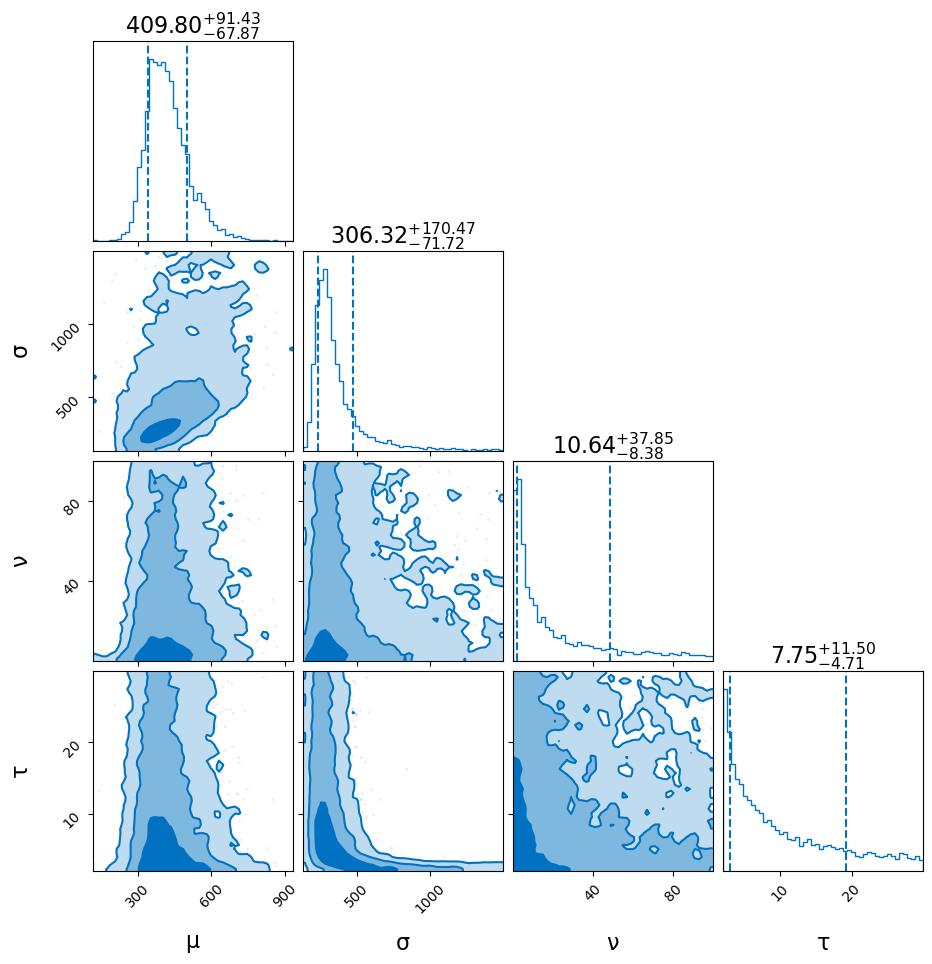

In [27]:
#begin SST
from scipy.special import beta
def hyper_prior_sst(dataset, mu,sigma,nu,tau):
        c = 2 * nu * ((1 + nu ** 2) *
                                beta(0.5, tau / 2) *
                                tau ** 0.5) ** -1
        m = ((2 * tau ** 0.5) * (nu - nu ** -1)) / (
                (tau - 1) * beta(0.5, 0.5 * tau))
        s2 = ((tau / (tau - 2)) * (
                nu ** 2 + nu ** -2 - 1) - m ** 2)
        mu_0 = mu - (sigma * m / np.sqrt(s2))
        sigma_0 = sigma / np.sqrt(s2)
        z = (dataset['mu'] - mu_0) / sigma_0
        p = np.where(dataset['mu'] < mu_0,
                     (c / sigma_0) * (1 + ((nu ** 2) * (z ** 2)) / tau) ** (
                             -(tau + 1) / 2),
                     (c / sigma_0) * (1 + (z ** 2) / ((nu ** 2) * tau)) ** (
                             -(tau + 1) / 2))
        return p

hp_priors_sst = dict(mu=Uniform(10, 4000, 'mlo',r'$\rm{\mu}$'),
                sigma=Uniform(10, 1500, 'sigma',r'$\rm{\sigma}$'),
                nu=LogUniform(0.01,100,'nu',r'$\rm{\nu}$'),
                tau=LogUniform(2.01,30,'tau',r'$\rm{\tau}$') )
#end SST

hyper_prior_sst=hyper_prior_sst
hp_likelihood_sst = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_sst,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_sst =hp_priors_sst

# And run sampler
result_sst = run_sampler(
    likelihood=hp_likelihood_sst, priors=hp_priors_sst, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='u_hype_{}'.format(np.random.randint(1,88888)),
    verbose=True, clean=True,npool=npool)
result_sst.plot_corner()

16:21 bilby INFO    : Running for label 'exponential_hype_3220', output will be saved to 'hy_outdir'
16:21 bilby INFO    : Analysis priors:
16:21 bilby INFO    : lam=LogUniform(minimum=0.0001, maximum=0.01, name='lam', latex_label='$\\lambda$', unit=None, boundary=None)
16:21 bilby INFO    : mlo=LogUniform(minimum=0.01, maximum=400, name='mlo', latex_label='$\\rm{v^l}$', unit=None, boundary=None)
16:21 bilby INFO    : mup=LogUniform(minimum=400, maximum=4000, name='mup', latex_label='$\\rm{v^u}$', unit=None, boundary=None)
16:21 bilby INFO    : Analysis likelihood class: <class 'bilby.hyper.likelihood.HyperparameterLikelihood'>
16:21 bilby INFO    : Analysis likelihood noise evidence: 0
/home/lz/miniconda3/envs/lz/lib/python3.13/site-packages/bilby/hyper/likelihood.py:64: RuntimeWarning: divide by zero encountered in log
  log_l = np.sum(np.log(np.sum(self.hyper_prior.prob(self.data, **parameters) /
16:21 bilby INFO    : Single likelihood evaluation took 3.549e-04 s
16:21 bilby INFO   

1it [00:00, ?it/s]

16:21 bilby INFO    : Written checkpoint file hy_outdir/exponential_hype_3220_resume.pickle
16:21 bilby INFO    : Starting to close worker pool.
16:21 bilby INFO    : Finished closing worker pool.
16:21 bilby INFO    : Rejection sampling nested samples to obtain 4564 posterior samples
16:21 bilby INFO    : Sampling time: 0:00:21.378117
16:21 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


16:21 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
16:21 bilby INFO    : Summary of results:
nsamples: 4564
ln_noise_evidence:  0.000
ln_evidence: -128.559 +/-  0.038
ln_bayes_factor: -128.559 +/-  0.038



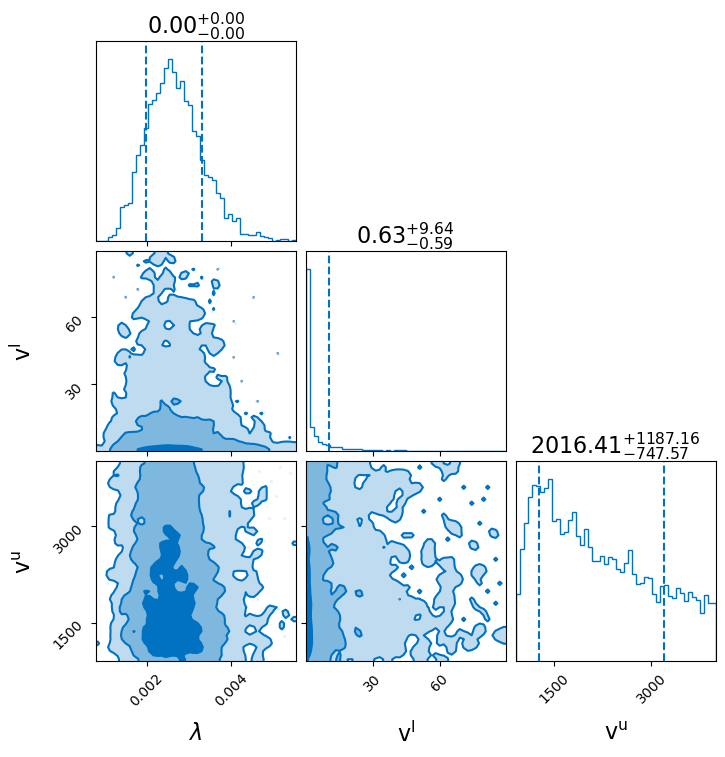

In [28]:
from scipy.stats import expon

def hyper_prior_exponential(dataset, mup, mlo, lam):
    valid_range = (dataset['mu'] >= mlo) & (dataset['mu'] <= mup)
    # Exponential PDF
    pdf_values = expon.pdf(dataset['mu'], scale=1/lam)
    # 限制范围外的概率为 0
    log_likelihood = valid_range * pdf_values
    return log_likelihood

hp_priors_exponential = dict(
    lam=LogUniform(0.0001, 0.01, 'lam', r'$\lambda$'),  # 速率参数范围
    mlo=LogUniform(0.01, 400, 'mlo', r'$\rm{v^l}$'),  # 下限范围
    mup=LogUniform(400, 4000, 'mup', r'$\rm{v^u}$')    # 上限范围
)

hyper_prior_exponential = hyper_prior_exponential

hp_likelihood_exponential = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior_exponential,
    sampling_prior=run_prior, log_evidences=0, max_samples=mx)

hp_priors_exponential = hp_priors_exponential

# 运行采样器
result_exponential = run_sampler(
    likelihood=hp_likelihood_exponential, priors=hp_priors_exponential, sampler='dynesty', nlive=nlive,
    use_ratio=False, outdir=outdir, label='exponential_hype_{}'.format(np.random.randint(1, 88888)),
    verbose=True, clean=True, npool=npool)

# 绘制角图
result_exponential.plot_corner()

In [1]:
import bilby
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_exponential='/home/lz/work/pulsar_kick_velocity/hy_outdir/exponential_hype_3220_result.json'
result_exponential = bilby.result.read_in_result(file_exponential)
posterior_exponential=result_exponential.posterior
print(posterior_exponential)

           lam        mlo          mup  log_likelihood  log_prior
0     0.000794   0.095602  1191.426501     -134.991684  -2.318424
1     0.005529   0.081126  1562.551632     -131.642929  -4.366367
2     0.005115  43.416587  1716.003231     -131.502888 -10.664833
3     0.001066   0.121281  2108.060162     -131.470054  -3.421835
4     0.005457   0.049747  2759.436645     -131.437020  -4.432791
...        ...        ...          ...             ...        ...
4559  0.002638   0.056270  2652.522452     -126.364744  -3.789781
4560  0.002632   0.010893  2578.882500     -126.364743  -2.117386
4561  0.002633   0.296471  3626.720252     -126.364736  -5.762275
4562  0.002636   0.155623  3050.926251     -126.364731  -4.946264
4563  0.002634   0.311318  3503.568341     -126.364730  -5.777168

[4564 rows x 5 columns]


1σ 中心区间: (0.0020, 0.003307)
0.0026044103640850934


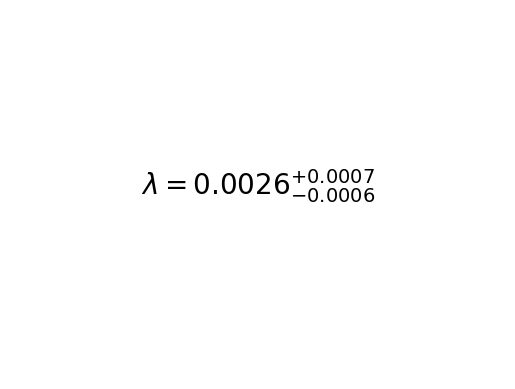

In [2]:

# 计算中心区间
center_interval = np.percentile(posterior_exponential['lam'], [16, 84])
print(f"1σ 中心区间: ({center_interval[0]:.4f}, {center_interval[1]:.4})")
median_lam=np.median(posterior_exponential['lam'])
print(median_lam)
alpha = center_interval[1] - median_lam
beta = median_lam - center_interval[0]

latex_str = f"$\\lambda = {median_lam:.4f} ^{{+{alpha:.4f}}} _{{-{beta:.4f}}}$"
# 显示LaTeX公式
plt.text(0.5, 0.5, latex_str, fontsize=20, ha='center')
plt.axis('off')  # 关闭坐标轴
plt.show()

In [2]:
print(bayes_factors)

[np.float64(1.6470733735153842), np.float64(0.5752215546291654), np.float64(0.8319358038266738), np.float64(1.1365530026970765), np.float64(0.3027039541821449), np.float64(0.19281964670509122), np.float64(0.9792189645694728), np.float64(0.9277434863285634)]


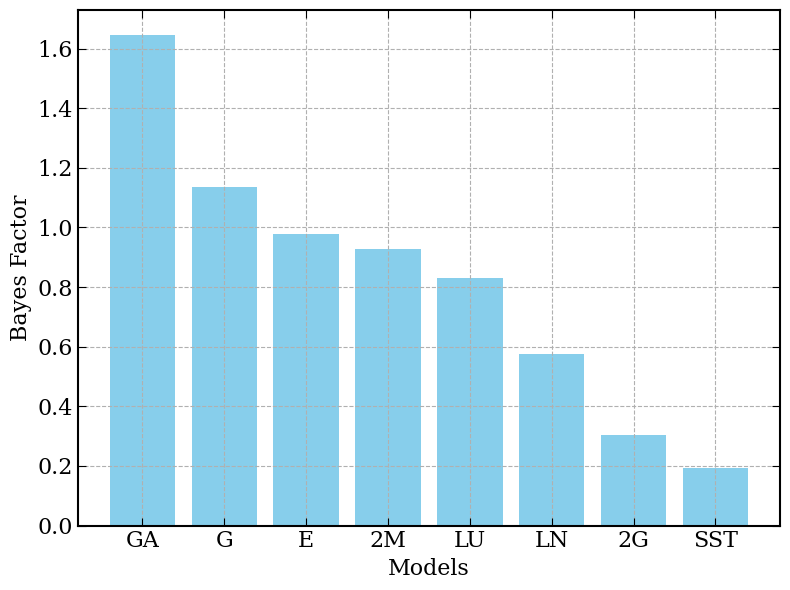

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["STIX Two Text", "Times", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "axes.linewidth": 1.5,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
})

BF_gamma_maxwell=-128.039+128.538
BF_lognormal_maxwell=-129.091 +128.538
BF_loguniform_maxwell=-128.722+128.538
BF_gaussian_maxwell=-128.410+128.538
BF_double_gaussian_maxwell=-129.733+128.538
#BF_power_exponential=-158.387+161.920
BF_sst_maxwell=-130.184+128.538
BF_exponential_maxwell=-128.559+128.538
BF_double_maxwell_maxwell=-128.613+128.538
#------------------exp of BF----------------------
BF_gamma_maxwell_exp=np.exp(BF_gamma_maxwell)
BF_lognormal_maxwell_exp=np.exp(BF_lognormal_maxwell)
BF_loguniform_maxwell_exp=np.exp(BF_loguniform_maxwell)
BF_gaussian_maxwell_exp=np.exp(BF_gaussian_maxwell)
BF_double_gaussian_maxwell_exp=np.exp(BF_double_gaussian_maxwell)
#BF_power_exponential_exp=np.exp(BF_power_exponential)
BF_sst_maxwell_exp=np.exp(BF_sst_maxwell)
BF_exponential_maxwell_exp=np.exp(BF_exponential_maxwell)
BF_double_maxwell_maxwell_exp=np.exp(BF_double_maxwell_maxwell)
#-------------------------------------------------
from matplotlib.ticker import MultipleLocator,FuncFormatter
# Simplified labels for models
models = ["GA", "LN", "LU", "G", "2G", "SST","E","2M"]
'''
bayes_factors=[BF_gamma_exponential, BF_lognormal_exponential,BF_loguniform_exponential,
               BF_gaussian_exponential,BF_double_gaussian_exponential,
'''
bayes_factors=[BF_gamma_maxwell_exp, BF_lognormal_maxwell_exp,BF_loguniform_maxwell_exp,
               BF_gaussian_maxwell_exp,BF_double_gaussian_maxwell_exp,
               BF_sst_maxwell_exp,BF_exponential_maxwell_exp,BF_double_maxwell_maxwell_exp]
# 从大到小排序  
sorted_indices = np.argsort(bayes_factors)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_bayes_factors = [bayes_factors[i] for i in sorted_indices]

# 绘制柱状图
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xticks([-2,-1,0,1])
#ax.set_yticks([10**4,1.5*10**4,2*10**4,2.5*10**4])
plt.tick_params(top='on', right='on', which='both')
#ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(10000))
ax.tick_params(axis='both',which='both',direction='in',labelsize=16)
plt.bar(sorted_models, sorted_bayes_factors, color='skyblue',log=False)

plt.ylabel("Bayes Factor", fontsize=16)
plt.xlabel("Models", fontsize=16)
#plt.title("Bayes Factors Comparison", fontsize=14)
#plt.yscale('log')
plt.tight_layout()
#plt.yscale('log')
plt.grid(linestyle='--')
plt.savefig('Bayes_factors_comparison.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [2]:
print(bayes_factors)

[np.float64(1.6470733735153842), np.float64(0.5752215546291654), np.float64(0.8319358038266738), np.float64(1.1365530026970765), np.float64(0.3027039541821449), np.float64(0.19281964670509122), np.float64(0.9792189645694728), np.float64(0.9277434863285634)]


In [4]:
from scipy.special import beta
from scipy.special import gamma
def hyper_prior_gamma(dataset, k,theta):
    return (1 / (gamma(k)*theta**k)) * dataset['mu']**(k-1) *np.exp(-dataset['mu']/theta)


In [6]:
import bilby
latest_file_maxwell='/home/lz/work/pulsar_kick_velocity/hy_outdir/maxwell_hype_40965_result.json'
result_maxwell = bilby.result.read_in_result(latest_file_maxwell)
posterior_maxwell=result_maxwell.posterior
sigma_m=posterior_maxwell['sigma']
import numpy as np
# ==========================================
# 1. 计算衍生参数 (Derived Parameters)
# ==========================================
# 利用整条后验链计算平均速度
# 公式: Mean = 2 * sqrt(2/pi) * sigma
v_mean_samples = 2 * np.sqrt(2 / np.pi) * sigma_m.values 
# 注意: .values 确保它是 numpy array，如果已经是 array 则不需要
# 如果你也需要 Mode (峰值):
v_mode_samples = np.sqrt(2) * sigma_m.values

# ==========================================
# 2. 统计函数 (计算中位数和误差)
# ==========================================
def get_stats(samples):
    """计算 16%, 50%, 84% 分位数"""
    q16, q50, q84 = np.percentile(samples, [16, 50, 84])
    val = q50
    upper = q84 - q50
    lower = q50 - q16
    return val, upper, lower

# ==========================================
# 3. 计算并打印结果
# ==========================================

# --- Sigma (原始参数) ---
s_val, s_up, s_lo = get_stats(sigma_m)

# --- Mean Velocity (平均值) ---
mean_val, mean_up, mean_lo = get_stats(v_mean_samples)

# --- Mode Velocity (峰值 - 可选) ---
mode_val, mode_up, mode_lo = get_stats(v_mode_samples)

print("\n" + "="*50)
print(" >>> 单 Maxwell 模型计算结果 <<<")
print("="*50)

print(f"1. Dispersion (sigma): {s_val:.2f} (+{s_up:.2f} / -{s_lo:.2f}) km/s")

print("-" * 50)
print(f"2. Mean Velocity <v>:")
print(f"   数值: {mean_val:.2f} (+{mean_up:.2f} / -{mean_lo:.2f}) km/s")
# 生成 LaTeX 格式方便复制
print(f"   LaTeX: \\langle v \\rangle = {mean_val:.0f}^{{+{mean_up:.0f}}}_{{-{mean_lo:.0f}}} \\, \\mathrm{{km}}\\,\\mathrm{{s}}^{{-1}}")

print("-" * 50)
print(f"3. Mode Velocity (Peak):")
print(f"   数值: {mode_val:.2f} (+{mode_up:.2f} / -{mode_lo:.2f}) km/s")
print(f"   LaTeX: v_{{\\mathrm{{peak}}}} = {mode_val:.0f}^{{+{mode_up:.0f}}}_{{-{mode_lo:.0f}}} \\, \\mathrm{{km}}\\,\\mathrm{{s}}^{{-1}}")

print("="*50 + "\n")


 >>> 单 Maxwell 模型计算结果 <<<
1. Dispersion (sigma): 270.11 (+32.44 / -27.76) km/s
--------------------------------------------------
2. Mean Velocity <v>:
   数值: 431.04 (+51.77 / -44.30) km/s
   LaTeX: \langle v \rangle = 431^{+52}_{-44} \, \mathrm{km}\,\mathrm{s}^{-1}
--------------------------------------------------
3. Mode Velocity (Peak):
   数值: 382.00 (+45.88 / -39.26) km/s
   LaTeX: v_{\mathrm{peak}} = 382^{+46}_{-39} \, \mathrm{km}\,\mathrm{s}^{-1}



In [8]:
def hyper_prior_maxwell(dataset,mlo,mup,sigma):
    log_likelihood = ((dataset['mu'] >= mlo) & (dataset['mu'] <= mup)) * maxwell.pdf(dataset['mu'],scale=sigma)
    return log_likelihood


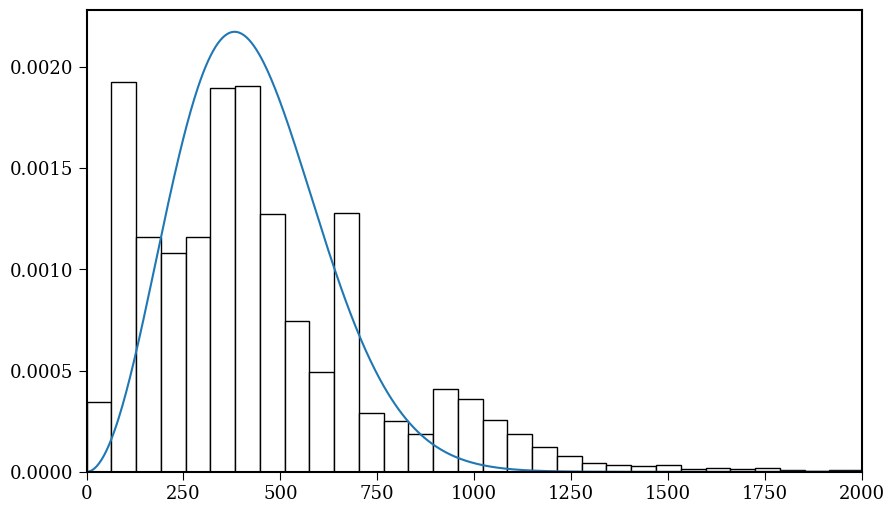

In [10]:
from scipy.stats import maxwell
x=np.linspace(min(samples_new),max(samples_new),1000)
mup = posterior_maxwell['mup']  # 从 posterior 中提取后验值
mlo = posterior_maxwell['mlo']
beta = posterior_maxwell['sigma']
mup_median_maxwell = np.median(mup)
mlo_median_maxwell = np.median(mlo)
beta_median_maxwell = np.median(beta)
dataset_x = {'mu': x}
#prior_distribution_maxwell=hyper_prior_maxwell(dataset_x,min(samples_new),mup_median_maxwell,beta_median_maxwell)
prior_distribution_maxwell=maxwell.pdf(x,scale=beta_median_maxwell)
mup_90_ci = np.percentile(mup, [5, 95])  # mup 的 90% 置信区间
mlo_90_ci = np.percentile(mlo, [5, 95])  # mlo 的 90% 置信区间
sigma_90_ci = np.percentile(beta, [5, 95])  # sigma 的 90% 置信区间
#prior_distribution=maxwell.pdf(x,sigma_median)
plt.figure(figsize=(10, 6))
plt.plot(x, prior_distribution_maxwell)
plt.hist(samples_new,density=True,bins=50,color='white',edgecolor='black',alpha=1,label='Samples')

# 计算所有样本对应的先验分布
prior_lines = []
for i in range(len(mup)):
    dataset_x = {'mu': x}
    prior_distribution = hyper_prior_maxwell(dataset_x, mup[i], mlo[i], beta[i])
    prior_lines.append(prior_distribution)

# 将所有样本的先验分布堆叠起来（按列堆叠，构成一个矩阵）
prior_lines = np.array(prior_lines)
average_prior_distribution = np.mean(prior_lines, axis=0)
# 计算 90% 置信区间（所有先验分布的 5% 和 95% 分位数）
lower_90 = np.percentile(prior_lines, 5, axis=0)  # 5% 分位数
upper_90 = np.percentile(prior_lines, 95, axis=0)  # 95% 分位数
#plt.fill_between(x, lower_90, upper_90, color='orange', alpha=0.6, label='90% CI')
plt.xlim(0,2000)
# 显示图形
plt.show()

             k       theta  log_likelihood  log_prior
0     2.644050   78.409451     -132.274687  -9.057237
1     8.859605   52.389170     -131.288338  -9.863183
2     8.863380   50.651003     -130.833784  -9.829868
3     0.727491  300.005847     -130.114986  -9.108629
4     0.732608  305.600916     -129.891106  -9.134116
...        ...         ...             ...        ...
5376  2.831906  139.588063     -123.437150  -9.702626
5377  2.770266  142.757911     -123.436757  -9.703074
5378  2.782083  140.612888     -123.436524  -9.692191
5379  2.790906  140.517290     -123.436106  -9.694677
5380  2.789216  140.831313     -123.435975  -9.696304

[5381 rows x 4 columns]


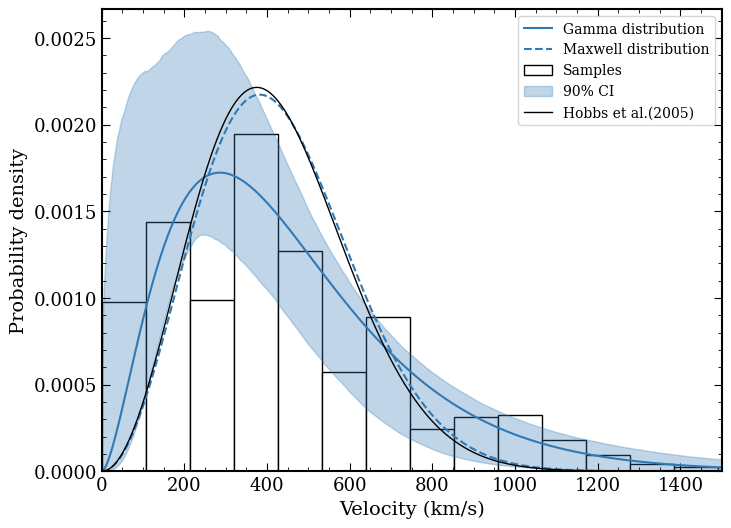

In [18]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["STIX Two Text", "Times", "DejaVu Serif"],
    "mathtext.fontset": "stix",
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "axes.linewidth": 1.5,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
})

latest_file_gamma='/home/lz/work/pulsar_kick_velocity/hy_outdir/u_hype_68279_result.json'
result_gamma = bilby.result.read_in_result(latest_file_gamma)
posterior_gamma=result_gamma.posterior
print(posterior_gamma)

x=np.linspace(min(samples_new),max(samples_new),1000)
k_gamma = posterior_gamma['k']  # 从 posterior 中提取后验值 
theta_gamma= posterior_gamma['theta']
k_gamma_median = np.mean(k_gamma)
theta_gamma_median = np.mean(theta_gamma)
dataset_x = {'mu': x}
prior_distribution_gamma=hyper_prior_gamma(dataset_x,k_gamma_median,theta_gamma_median)

prior_lines = []
for i in range(len(k_gamma)):
    dataset_x = {'mu': x}
    prior_distribution = hyper_prior_gamma(dataset_x,k_gamma[i],theta_gamma[i])
    prior_lines.append(prior_distribution)

# 将所有样本的先验分布堆叠起来（按列堆叠，构成一个矩阵）
prior_lines = np.array(prior_lines)
average_prior_distribution = np.mean(prior_lines, axis=0)
# 计算 90% 置信区间（所有先验分布的 5% 和 95% 分位数）
lower_90 = np.percentile(prior_lines, 5, axis=0)  # 5% 分位数
upper_90 = np.percentile(prior_lines, 95, axis=0)  # 95% 分位数
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(x, prior_distribution_gamma,color='#3179B5',label="Gamma distribution")
plt.plot(x, prior_distribution_maxwell,color='#3179B5',linestyle='--',label="Maxwell distribution")
plt.hist(samples_new,density=True,bins=30,color='white',edgecolor='black',alpha=1,label='Samples')
plt.fill_between(x, lower_90, upper_90, color='#3179B5', alpha=0.3, label='90% CI')  #danube color #3179B5
plt.xlim(0,2000)
plt.tick_params(top='on', right='on', which='both')
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.0001))
ax.tick_params(axis='both',which='both',direction='in')
# 画Hobbs2005图
x_range = np.linspace(0, 1500, 500)  # Range of x from 0 to 1500
pdf_values = maxwell.pdf(x_range, scale=265)
plt.plot(x_range, pdf_values, color='black',linewidth=1,label=r"Hobbs et al.(2005)")
plt.legend(loc='upper right')
plt.xlabel('Velocity (km/s)',fontsize=14)
plt.ylabel('Probability density',fontsize=14)
plt.savefig('pdf_3D_Velocity_18.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.xlim(0,1500)
plt.show()
# 显示图形